<div class="alert" style="background-color:#fff; color:white; padding:0px 10px; border-radius:5px;"><h1 style='margin:15px 15px; color:#006a79; font-size:40px'> Evaluation Metrics for Classification</h1>
</div>

Topic to be covered  - 
1. [Accuracy](#1)
1. [Confusion Metric](#2)
1. [Accuracy, Precision, Recall, F-1 score](#3)
1. [Sensitivity, Specificity and Detection Rate](#4)
1. [ROC curve](#5) 
1. [AUC](#6)
1. [Gini's coeffecient](#7)
1. [KS Statistics](#8)
1. [Brier Score Loss](#9)
1. [Log Loss or cross entropy loss](#10)

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>Churn Modelling</h2>
</div>

**Goal :** To predict if a customer has left the bank(closed his/her account) or he/she continues to be a customer

**Data :** The data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he/she continues to be a customer.

Before going into details of handling imbalanced data let's load the churn modelling data and make it ready for classification.

#### Import Libraries

In [1]:
#Import Libraries
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report, accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.metrics import classification_report 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 800)
pd.set_option('display.max_columns', 500)

#### Load Data

In [3]:
churn_data = pd.read_csv('C:/Users/maste/Documents/Personal/ML+/Learning/Logistic regression/Dataset/Churn_Modelling.csv',index_col='RowNumber')

In [5]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
churn_data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Once you have loaded the data, you need to pre process it before building the model. Hence let's pre process it
#### Data pre - processing

In [9]:
# Drop few columns which won't contribute to the model using domain knowldedge.
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [10]:
# Let's do one hot encoding for the column `Geo` as Logistic Regression model would be expecting numeric features
churn_data = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [11]:
# Rather than using one hot encoding we can do label encoding as well. Here let's use replace function rather than label encoder
churn_data = churn_data.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

In [12]:
churn_data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
2,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
3,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
4,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
5,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1


#### Model Building

In [13]:
# Split the y variable series and x variables dataset
X = churn_data.drop(['Exited'],axis=1)
y = churn_data.Exited

In [14]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [15]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


## Logistic Regression Classification

In [28]:
# Define the model
lr = LogisticRegression()

# Train the model
lr.fit(X_train, y_train)

# Predicting target values on x_test dataset
y_predicted = lr.predict(X_test)
y_predicted_prob = lr.predict_proba(X_test)
y_predicted_prob = [x[1] for x in y_predicted_prob]

In [29]:
# Checking the performance of logistic regression model
score_lr = lr.score(X_test, y_test)
print(score_lr)

0.8075757575757576


## Performance Metric
- https://www.ritchieng.com/machine-learning-evaluate-classification-model/
- https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r/
- https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
- https://dzone.com/articles/calculating-auc-and-gini-model-metrics-for-logisti
- https://heartbeat.fritz.ai/classification-model-evaluation-90d743883106

<a id="1"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>1. Accuracy</h2>
</div>

In [30]:
from sklearn.metrics import accuracy_score 

actual = y_test
predicted = y_predicted 
accuracy = accuracy_score(actual, predicted) 


print('Accuracy :' ,accuracy) 

Accuracy : 0.8075757575757576


<a id="2"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>2. Confusion Metric</h2>
</div>

In [33]:
# Python script for confusion matrix creation. 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 


actual = y_test
predicted = y_predicted 
results = confusion_matrix(actual, predicted) 


print ('Confusion Matrix :')
print(results) 

Confusion Matrix :
[[2511  106]
 [ 529  154]]


<a id="3"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>3. Accuracy Precision Recall F1 Score</h2>
</div>

In [34]:
print ('Accuracy Score :',accuracy_score(actual, predicted) )
print ('Report : ')
print (classification_report(actual, predicted) )

Accuracy Score : 0.8075757575757576
Report : 
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2617
           1       0.59      0.23      0.33       683

    accuracy                           0.81      3300
   macro avg       0.71      0.59      0.61      3300
weighted avg       0.78      0.81      0.77      3300



<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

#### `Summary` :

Total number of classes predicted correctly is called `accuracy`.

The approach here is to find what percentage of the model’s positive (1’s) predictions are accurate. This is nothing but `Precision`.

Let’s suppose you have a model with high precision, I also want to know what percentage of ALL 1’s were covered. This can be captured using Sensitivity.

But in this context, it is known as `Recall`. Just because, it is customary to call them together as `Precision and Recall`.

A high precision score gives more confidence to the model’s capability to classify 1’s. Combining this with Recall gives an idea of how many of the total 1’s it was able to cover.

A good model should have a good precision as well as a high recall. So ideally, I want to have a measure that combines both these aspects in one single metric – the `F1 Score`.

   **F1 Score = (2 * Precision * Recall) / (Precision + Recall)**

<a id="4"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>4. Sensitivity, Specificity and Detection Rate</h2>
</div>

In [35]:
from sklearn import metrics

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_predicted)
print("Confusion Metric")
print(confusion,  "\n")
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[1, 0]
FN = confusion[0, 1]


# Classification Accuracy 

# use float to perform true division, not integer division
print("Accuracy or Detection Rate")
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_predicted), "\n")

# Classification Error

classification_error = (FP + FN) / float(TP + TN + FP + FN)
print("Classification Error")
print(classification_error)
print(1 - metrics.accuracy_score(y_test, y_predicted), "\n")

# Sensitivity

sensitivity = TP / float(FN + TP)
print("Sensitivity")
print(sensitivity, "\n")


# Specificity
print("Specificity")
specificity = TN / (TN + FP)

print(specificity)

Confusion Metric
[[2511  106]
 [ 529  154]] 

Accuracy or Detection Rate
0.8075757575757576
0.8075757575757576 

Classification Error
0.19242424242424241
0.1924242424242424 

Sensitivity
0.5923076923076923 

Specificity
0.8259868421052632


<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

#### `Summary : `
Sensitivity is the percentage of actual 1’s that were correctly predicted. It shows what percentage of 1’s were covered by the model.

The total number of 1’s is 260 out of which 154 was correctly predicted. So, sensitivity is 154/260 = 59.23%

Sensitivity matters more when classifying the 1’s correctly is more important than classifying the 0’s. Just like what we need here in churn case, where you don’t want to miss out any churned customer to be classified as ‘not churned’.

Likewise, Specificity is the proportion of actual 0’s that were correctly predicted. So in this case, it is 2511 / (3040) = 82.59%.

Specificity matters more when classifying the 0’s correctly is more important than classifying the 1’s.

Maximizing specificity is more relevant in cases like spam detection, where you strictly don’t want genuine messages (0’s) to end up in spam (1’s).

Detection rate is the proportion of the whole sample where the events were detected correctly. So, it is 2665 / 3300 = 80.75%.

<a id="5"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>5. ROC curve</h2>
</div>

Often, choosing the best model is sort of a balance between predicting the one's accurately or the zeroes accurately. In other words sensitivity and specificity.

But it would be great to have something that captures both these aspects in one single metric.

This is nicely captured by the 'Receiver Operating Characteristics' curve, also called as the ROC curve. In fact, the area under the ROC curve can be used as an evaluation metric to compare the efficacy of the models.

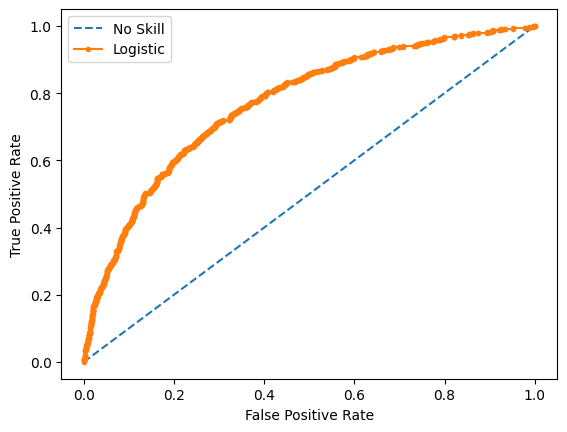

In [36]:
# roc curve and auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

lr_probs = lr.predict_proba(X_test)
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

<div class="alert alert-info" style="padding:0px 10px; border-radius:5px;"><h4 style='margin:10px 5px'> Inferences:</h4>
</div>

#### `Summary : `

Interpreting the ROC plot is very different from a regular line plot. Because, though there is an X and a Y-axis, you don't read it as: for an X value of 0.25, the Y value is .9.

Instead, what we have here is a line that traces the probability cutoff from 1 at the bottom-left to 0 in the top right.

This is a way of analyzing how the sensitivity and specificity perform for the full range of probability cutoffs, that is from 0 to 1.

Ideally, if you have a perfect model, all the events will have a probability score of 1 and all non-events will have a score of 0. For such a model, the area under the ROC will be a perfect 1.

So, if we trace the curve from bottom left, the value of probability cutoff decreases from 1 towards 0. If you have a good model, more of the real events should be predicted as events, resulting in high sensitivity and low FPR. In that case, the curve will rise steeply covering a large area before reaching the top-right.

Therefore, the larger the area under the ROC curve, the better is your model.

<a id="6"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>6. AUC</h2>
</div>

The area under ROC curve is known as AUC, it's values goes from 0.5 to 1, if somehow the value is less that 0.5, that means we are predicting in the wrong direction and we can alter the prediction outputs, hence the AUC would be 1 - AUC initial, now it would be greater than 0.5

In [18]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.770


<a id="7"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>7. Gini's coeffecient</h2>
</div>

Gini Coefficient is an indicator of how well the model outperforms random predictions. It can be computed from the area under the ROC curve using the following formula:

Gini Coefficient = (2 * AUROC) - 1

In [19]:
# Gini Coefficient = (2 * AUROC) - 1

gini_coeff = 2*lr_auc - 1
print(gini_coeff)

0.5403855073063775


<a id="8"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>8. KS Statistics</h2>
</div>

- https://www.listendata.com/2019/07/KS-Statistics-Python.html
- https://statcompute.wordpress.com/2012/11/18/calculating-k-s-statistic-with-python/

The KS Statistic and the KS Chart (discussed next) are used to make decisions like: How many customers to target for a marketing campaign? or How many customers should we pay for to show ads etc.

So how to compute the Kolmogorov-Smirnov statistic?

Step 1: Once the prediction probability scores are obtained, the observations are sorted by decreasing order of probability scores. This way, you can expect the rows at the top to be classified as 1 while rows at the bottom to be 0's.

Step 2: All observations are then split into 10 equal sized buckets (bins).

Step 3: Then, KS statistic is the maximum difference between the cumulative percentage of responders or 1's (cumulative true positive rate) and cumulative percentage of non-responders or 0's (cumulative false positive rate).

The significance of KS statistic is, it helps to understand, what portion of the population should be targeted to get the highest response rate (1's).

In [20]:
## KS 2 sample method

from scipy.stats import ks_2samp

df = pd.DataFrame({"prob" : lr_probs, "y_test" : y_test})

ks_2samp(df.loc[df.y_test==0,"prob"], df.loc[df.y_test==1,"prob"])

KstestResult(statistic=0.4154259988329489, pvalue=3.3295809917944807e-85)

In [21]:
## Decline method

def ks(data=None,target=None, prob=None):
    data['target0'] = 1 - data[target]
    data['bucket'] = pd.qcut(data[prob], 10)
    grouped = data.groupby('bucket', as_index = False)
    kstable = pd.DataFrame()
    kstable['min_prob'] = grouped.min()[prob]
    kstable['max_prob'] = grouped.max()[prob]
    kstable['events']   = grouped.sum()[target]
    kstable['nonevents'] = grouped.sum()['target0']
    kstable = kstable.sort_values(by="min_prob", ascending=False).reset_index(drop = True)
    kstable['event_rate'] = (kstable.events / data[target].sum()).apply('{0:.2%}'.format)
    kstable['nonevent_rate'] = (kstable.nonevents / data['target0'].sum()).apply('{0:.2%}'.format)
    kstable['cum_eventrate']=(kstable.events / data[target].sum()).cumsum()
    kstable['cum_noneventrate']=(kstable.nonevents / data['target0'].sum()).cumsum()
    kstable['KS'] = np.round(kstable['cum_eventrate']-kstable['cum_noneventrate'], 3) * 100

    #Formating
    kstable['cum_eventrate']= kstable['cum_eventrate'].apply('{0:.2%}'.format)
    kstable['cum_noneventrate']= kstable['cum_noneventrate'].apply('{0:.2%}'.format)
    kstable.index = range(1,11)
    kstable.index.rename('Decile', inplace=True)
    pd.set_option('display.max_columns', 9)
    print(kstable)
    
    #Display KS
    from colorama import Fore
    print(Fore.RED + "KS is " + str(max(kstable['KS']))+"%"+ " at decile " + str((kstable.index[kstable['KS']==max(kstable['KS'])][0])))
    return(kstable)

In [22]:
mydf = ks(data=df,target="y_test", prob="prob")

        min_prob  max_prob  events  nonevents event_rate nonevent_rate  \
Decile                                                                   
1       0.449141  0.901518     189        141     27.67%         5.39%   
2       0.327272  0.449111     133        197     19.47%         7.53%   
3       0.250397  0.327113     101        229     14.79%         8.75%   
4       0.198122  0.250387      68        262      9.96%        10.01%   
5       0.157623  0.198044      59        271      8.64%        10.36%   
6       0.126395  0.157535      44        286      6.44%        10.93%   
7       0.097064  0.126103      35        295      5.12%        11.27%   
8       0.073180  0.096996      20        310      2.93%        11.85%   
9       0.050555  0.073138      20        310      2.93%        11.85%   
10      0.010758  0.050452      14        316      2.05%        12.07%   

       cum_eventrate cum_noneventrate    KS  
Decile                                       
1             27.67

#### `Summary` : 

If KS is in top 3 decile and score above 40, it is considered a good predictive model. At the same time it is important to validate the model by checking other performance metrics as well to confirm that model is not suffering from overfitting problem.

In our case it's 40.3 for 3rd decile, so we can say that the model is good


<a id="9"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>9. Brier Score Loss</h2>
</div>

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.brier_score_loss.html

The smaller the Brier score, the better, hence the naming with “loss”. Across all items in a set N predictions, the Brier score measures the mean squared difference between (1) the predicted probability assigned to the possible outcomes for item i, and (2) the actual outcome. Therefore, the lower the Brier score is for a set of predictions, the better the predictions are calibrated. Note that the Brier score always takes on a value between zero and one, since this is the largest possible difference between a predicted probability (which must be between zero and one) and the actual outcome (which can take on values of only 0 and 1)

In [23]:
import numpy as np
from sklearn.metrics import brier_score_loss

brier_score_loss(y_test, lr_probs)

0.1367893043461415

#### `Summary : `

Brier Score is very less, so the model is fine

<a id="10"></a> <br>

<div class="alert alert-info" style="background-color:#006a79; color:white; padding:0px 10px; border-radius:5px;"><h2 style='margin:10px 5px'>10. Log Loss or cross entropy loss</h2>
</div>

- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.log_loss.html

Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of the true labels given a probabilistic classifier’s predictions. The log loss is only defined for two or more labels. For a single sample with true label yt in {0,1} and estimated probability yp that yt = 1, the log loss is

-log P(yt|yp) = -(yt log(yp) + (1 - yt) log(1 - yp))

In [24]:
from sklearn.metrics import log_loss
log_loss(y_test,lr_probs)

0.43117442486493035